In [1]:
# 2軸へ角速度指令 434.05 nm Calibration
import numpy as np
import pyautogui
import sys, time
import pandas as pd
import matplotlib.pyplot as plt
from dx2lib import *  # dx2libをインポート

COMPort = b'\\\\.\\COM4'  # 任意のCOMポート名に修正の事
Baudrate = 57600          # Dynamixelのボーレートと合わせる事
TargetID1 = 1             # 1台目のDynamixelのIDと合わせる事
#TargetID2 = 2             # 2台目のDynamixelのIDと合わせる事

#---------------------------------------------
# (1) ポートを開いてdevを取得(必須)
dev = DX2_OpenPort(COMPort, Baudrate)
if dev != None:
  # (2) IDの一覧
  IDs = (c_uint8 * 2)(TargetID1)
  #IDs = (c_uint8 * 2)(TargetID1, TargetID2)
  # (3) 指定IDのモデル情報を取得しモデル名を表示
  #   いちいちモデル名を表示する必要は無いが、情報取得のついでに表示
  #   また、ここでは情報の取得ができたかの確認をしていない
  for id in IDs:
    print(id, DXL_GetModelInfo(dev,id).contents.name.decode())

  # (4) DynamixelをVelocityモード=1に変更
  DXL_SetOperatingModesEquival(dev, IDs, 2, 4)
  # (5) トルクイネーブル(必須)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, True)

  # (6) 2軸分の角速度[deg/sec]と時間待ちを順次指令
  StartAngle = 0
  EndAngle = 0
  Resolution = 2.4
  DXL_SetGoalAngleAndVelocity(dev, TargetID1, StartAngle, 70)
  time.sleep(5)
  i = 0
  for i in np.arange(StartAngle, EndAngle, Resolution):
#   for i in a:
    DXL_SetGoalAngleAndVelocity(dev, TargetID1, i, 70)
    #DXL_SetGoalAngle(dev, TargetID2,  i)
    time.sleep(1)
    print(i)

#   DXL_SetGoalAngle(dev, TargetID1,  i)
#   DXL_SetGoalAngle(dev, TargetID2,  i)
#   time.sleep(5)

  
  # (7) トルクイネーブルディスエーブル(必要に応じて)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, False)

  # (8) ポートを閉じる(必須)
  DX2_ClosePort(dev)
else:
  print('Could not open COM port.')


1 XL430-W250
0 NONE


In [16]:
# 2軸へ角速度指令
import numpy as np
import pyautogui
import sys, time
import pandas as pd
import matplotlib.pyplot as plt
from dx2lib import *  # dx2libをインポート

COMPort = b'\\\\.\\COM4'  # 任意のCOMポート名に修正の事
Baudrate = 57600          # Dynamixelのボーレートと合わせる事
TargetID1 = 1             # 1台目のDynamixelのIDと合わせる事
#TargetID2 = 2             # 2台目のDynamixelのIDと合わせる事

#---------------------------------------------
# (1) ポートを開いてdevを取得(必須)
dev = DX2_OpenPort(COMPort, Baudrate)
if dev != None:
  # (2) IDの一覧
  IDs = (c_uint8 * 2)(TargetID1)
  #IDs = (c_uint8 * 2)(TargetID1, TargetID2)
  # (3) 指定IDのモデル情報を取得しモデル名を表示
  #   いちいちモデル名を表示する必要は無いが、情報取得のついでに表示
  #   また、ここでは情報の取得ができたかの確認をしていない
  for id in IDs:
    print(id, DXL_GetModelInfo(dev,id).contents.name.decode())

  # (4) DynamixelをVelocityモード=1に変更
  DXL_SetOperatingModesEquival(dev, IDs, 2, 4)
  # (5) トルクイネーブル(必須)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, True)

  # (6) 2軸分の角速度[deg/sec]と時間待ちを順次指令
  StartAngle = 210
  EndAngle = 250
  Resolution = 2.8
  DXL_SetGoalAngleAndVelocity(dev, TargetID1, StartAngle, 70)
  time.sleep(0.8)
  i = 0
  RepeatNum = 1
  dataX = []
  dataY = []
  for i in np.arange(StartAngle, EndAngle, Resolution):
#   for i in a:
    dataX.append(i) #x軸の値=角度
    DXL_SetGoalAngleAndVelocity(dev, TargetID1, i, 70)
    #DXL_SetGoalAngle(dev, TargetID2,  i)
    
    time.sleep(3)
    MaxVoltage = []
    for l in range(RepeatNum):
        pyautogui.click(140, 70)
        time.sleep(4)
        pyautogui.click(30, 70)
        time.sleep(1)
        pyautogui.click(800, 550)
        time.sleep(1)
        pyautogui.click(1100, 540)
        Data = []
        RawData = pd.read_csv(filepath_or_buffer="./Data/Waveform.txt")
        Data = np.average(RawData)
        MaxVoltage.append(Data)
    AverageMaxVoltage = sum(MaxVoltage) / len(MaxVoltage)
    dataY.append(AverageMaxVoltage) #y軸の値=強さ
    
  print(dataX)
  print(dataY)
  print(AverageMaxVoltage)
  
#   DXL_SetGoalAngle(dev, TargetID1,  i)
#   DXL_SetGoalAngle(dev, TargetID2,  i)
#   time.sleep(5)

  
  # (7) トルクイネーブルディスエーブル(必要に応じて)
  DXL_SetTorqueEnablesEquival(dev, IDs, 2, False)

  # (8) ポートを閉じる(必須)
  DX2_ClosePort(dev)
else:
  print('Could not open COM port.')


1 XL430-W250
0 NONE
[210.0, 212.8, 215.60000000000002, 218.40000000000003, 221.20000000000005, 224.00000000000006, 226.80000000000007, 229.60000000000008, 232.4000000000001, 235.2000000000001, 238.0000000000001, 240.80000000000013, 243.60000000000014, 246.40000000000015, 249.20000000000016]
[0.60056081099168, 0.038807131549696, -0.012484252523648001, -0.012704595749504001, -0.011157655841408003, -0.012731222763392001, -0.012348356145792001, 0.085503697383936, 0.39153751255385605, 0.7050486599827201, 0.5167994658164481, 0.11507444991366399, -0.010157253476928002, -0.010157253476928002, -0.010157253476928002]
-0.010157253476928002


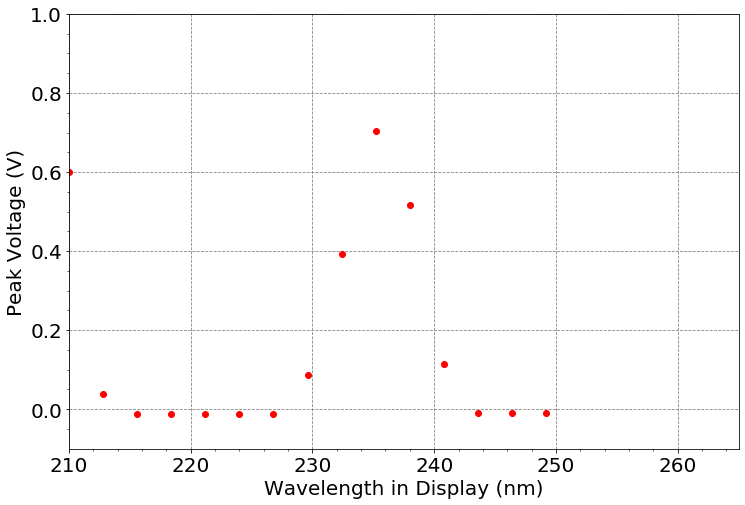

In [17]:
fig = plt.figure(figsize=(12, 8))
plt.plot(dataX, dataY, "ro", color="r",label="value1 of data01" )
#x = np.linspace()
#plt.xticks([0, 400, 800]) #目盛りの追加（データの番号）
plt.xticks(fontsize = 20) #軸目盛変更
plt.yticks(fontsize = 20) #軸目盛変更
#plt.xticks(np.arange(0, 1001, 125), np.arange(0, 80, 10)) #最後が表示されない？
#plt.yscale('log') #対数表示
plt.grid(color = "gray", linestyle="--") #()の中なしでも可
plt.minorticks_on() #補助目盛り
plt.xlim(210, 265)
plt.ylim(-0.1, 1) #軸の範囲
plt.xlabel("Wavelength in Display (nm)",size = "xx-large", fontsize = 20)
plt.ylabel("Peak Voltage (V)",size = "xx-large", fontsize = 20)
#plt.legend(loc="upper right") #ラベル位置指定
plt.show()
#plt.savefig("10ns.Harufa-py.jpg") #カレントフォルダに保存

In [38]:
a = []
RawData = pd.read_csv(filepath_or_buffer="./Data/Waveform.txt").values.tolist()
Data = np.average(RawData)
a.append(Data)
a.append(Data)
print(Data)
#print(RawData)
print(a)

0.0001840629999999999
[0.0001840629999999999, 0.0001840629999999999]


In [43]:
dataY = [1]
AverageVoltage = []
RawData = []
RawData = pd.read_csv(filepath_or_buffer="./Data/Waveform.txt")
Data = []
Ave = []
Ave = np.average(RawData)
AverageVoltage.append(Ave)
Voltage = sum(AverageVoltage) / len(AverageVoltage)
dataY.append(Voltage) #y軸の値=強さ
print(Ave)
print(Voltage)

print(dataY)

0.0001840629999999999
0.0001840629999999999
[1, 0.0001840629999999999]


In [ ]:
#2021/12/18 14;00 dye laser disenable noisy
[10020.0, 10024.8, 10029.599999999999, 10034.399999999998, 10039.199999999997, 10043.999999999996, 10048.799999999996, 10053.599999999995, 10058.399999999994, 10063.199999999993, 10067.999999999993, 10072.799999999992, 10077.599999999991, 10082.39999999999, 10087.19999999999, 10091.999999999989, 10096.799999999988, 10101.599999999988, 10106.399999999987, 10111.199999999986, 10115.999999999985, 10120.799999999985, 10125.599999999984, 10130.399999999983, 10135.199999999983, 10139.999999999982, 10144.799999999981, 10149.59999999998, 10154.39999999998, 10159.199999999979, 10163.999999999978, 10168.799999999977, 10173.599999999977, 10178.399999999976, 10183.199999999975, 10187.999999999975, 10192.799999999974, 10197.599999999973, 10202.399999999972, 10207.199999999972, 10211.99999999997, 10216.79999999997, 10221.59999999997, 10226.399999999969, 10231.199999999968, 10235.999999999967]
[0.00046066299999999994, 0.00035315199999999997, 0.000379413, 0.0003840925, 0.0003597265, 0.00038503799999999993, 0.00030128949999999995, 0.00043348649999999997, 0.0004366250000000001, 0.0016607550000000003, 0.0018495119999999996, 0.0021016954999999995, 0.0024823094999999996, 0.0033998194999999994, 0.0030923355, 0.0034810855000000003, 0.003353597499999999, 0.0032092455, 0.0031685879999999995, 0.0035529920000000005, 0.0036011239999999994, 0.0033732985, 0.0035026595, 0.0035811149999999997, 0.0035439135, 0.0034873375000000002, 0.003598896, 0.0029892165, 0.0034107719999999994, 0.0035660925, 0.0035858139999999997, 0.0032895635, 0.003602664, 0.0035260765, 0.0032248124999999994, 0.0035045285, 0.0033826584999999995, 0.0028861004999999997, 0.0024492095, 0.0007150914999999999, 0.0005172355000000001, 0.0004731885, 0.0004859935, 0.00046535200000000004, 0.0004219085, 0.00033784649999999994]
0.00033784649999999994

In [50]:
#2022/01/19 13:00
[220.0, 222.8, 225.60000000000002, 228.40000000000003, 231.20000000000005, 234.00000000000006, 236.80000000000007, 239.60000000000008, 242.4000000000001]
[0.025410755000000004, 0.03780480130003199, 0.043256629800896, 0.08631628529856, 0.14786348545216, 0.139733292934336, 0.082238025550464, 0.071325732092608, 0.071325732092608]
0.071325732092608

0.071325732092608

In [51]:
#2022/01/19 13:00
[210.0, 212.8, 215.60000000000002, 218.40000000000003, 221.20000000000005, 224.00000000000006, 226.80000000000007, 229.60000000000008, 232.4000000000001, 235.2000000000001, 238.0000000000001, 240.80000000000013, 243.60000000000014, 246.40000000000015, 249.20000000000016, 252.00000000000017, 254.80000000000018]
[0.071325732092608, -0.012135830095040002, -0.012023324408384002, -0.011770239952128001, -0.010593505071680002, -0.011123268422016002, 0.061172697849152004, 0.298951644379008, 0.31231601224051203, 0.317586711650688, 0.03988061457734401, 0.033526400839936, 0.033526400839936, 0.033526400839936, 0.033526400839936, 0.033526400839936, 0.033526400839936]

[0.071325732092608,
 -0.012135830095040002,
 -0.012023324408384002,
 -0.011770239952128001,
 -0.010593505071680002,
 -0.011123268422016002,
 0.061172697849152004,
 0.298951644379008,
 0.31231601224051203,
 0.317586711650688,
 0.03988061457734401,
 0.033526400839936,
 0.033526400839936,
 0.033526400839936,
 0.033526400839936,
 0.033526400839936,
 0.033526400839936]

In [ ]:
#2022/01/19 14:20
[210.0, 212.8, 215.60000000000002, 218.40000000000003, 221.20000000000005, 224.00000000000006, 226.80000000000007, 229.60000000000008, 232.4000000000001, 235.2000000000001, 238.0000000000001, 240.80000000000013, 243.60000000000014, 246.40000000000015, 249.20000000000016]
[0.60056081099168, 0.038807131549696, -0.012484252523648001, -0.012704595749504001, -0.011157655841408003, -0.012731222763392001, -0.012348356145792001, 0.085503697383936, 0.39153751255385605, 0.7050486599827201, 0.5167994658164481, 0.11507444991366399, -0.010157253476928002, -0.010157253476928002, -0.010157253476928002]
-0.010157253476928002